In [1]:
from numpy import *
from scipy.optimize import root
from matplotlib import use
#use("Qt5Agg")
import matplotlib.pyplot as plt


# Stiff vs. Non-Stiff Problems

## Implementing an IVP

Consider the 1D-IVP [Prothero, Robinson 1974]:

$\begin{align}
    x'(t) = \lambda(x -g(t)) + g'(t)\;, \quad x(\mathring{t}) = \mathring{x}\;.
\end{align}$

We choose

$\begin{align}
    \lambda &= -5\;, & g(t) = \cos(t)\;.
\end{align}$

##### Task:
- Implement a function $f(x, t)$ that yields the derivative of $x$.
- Assume $x$ to be vector-valued and so is $f$. Her you can choose between *lists* or *arrays* as datatypes.

In [2]:
def f(x, t):
    dx = -5*(x - cos(t)) - sin(t)
    return dx

The initial values $(\mathring{x}, \mathring{t})$ read $(0,0)$

#### Task:
- Create variables *t_start* and *x_start* holding the initial values

In [3]:
t_start = 0.
x_start = array([0])

For this IVP the analytical solution reads

$x(t) = (\mathring{x} - \cos(\mathring{t})) * \exp(-5(t - \mathring{t})) + \cos(t)\;.$

#### Task:
- Implement a function *x_exact(t)* that represents the above solution

In [12]:
def x_exact(t):
    x = (x_start - cos(t_start))*exp(-5*(t - t_start)) + cos(t)
    return x

## The Euler method for IVPs

### Implementing the explicit Euler method

Recall the algorithnm from the lecture for the **explicit** Euler method

$\begin{align}
 x^{[n]} = x^{[n-1]} + h_nF(x^{[n-1]}, t_{n-1})
\end{align}$

#### Task:
- Implement a function *integrate_expl_euler(f, x0, t0, T, h)* that returns an array or list of all timepoints and solutions

In [5]:
def integrate_expl_euler(f, x0, t0, T, h):
    
    Tn = arange(t0,T+h,h)
    N = len(Tn)
    m = len(x0)
    Xn = zeros([N,m])
    
    Tn[0] = t0
    Xn[0,:] = x0
    
    for n in range(1,N):
        Xn[n,:] = Xn[n-1,:] + h*f(Xn[n-1,:],Tn[n-1])
        
    return Tn, Xn

#### Task:
- Solve the Prothero/Robinson problem using the explicit Euler method up to $T=6.5$ and for step-size $h=0.75$. 
- Store the time points and approximations in *Tn, Xn*, respectively.

In [6]:
T = 6.5
h = 0.4

Tn, Xn = integrate_expl_euler(f, x_start, t_start, T, h)

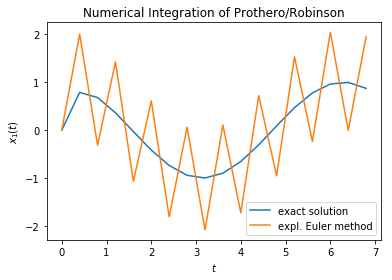

In [14]:
plt.figure()
plt.title("Numerical Integration of Prothero/Robinson")
plt.plot(Tn, [x_exact(t) for t in Tn], label="exact solution")
plt.plot(Tn, Xn,      label="expl. Euler method")
plt.xlabel("$t$")

plt.ylabel("$x_1(t)$")
plt.legend()
plt.show()


### Implementing the implicit Euler method for IVPs

Recall the algorithnm from the lecture for the **implicit** Euler method

$\begin{align}
 x^{[n]} = x^{[n-1]} + h_nF(x^{[n]}, t_{n})
\end{align}$

In other words, in each step one has to solve the nonlinear problem for $x$:

$\begin{align}
 0 = x^{[n-1]} + h_nF(x, t_{n}) - x
\end{align}$

#### Task:
- Implement a function *integrate_impl_euler(f, x0, t0, T, h)* that returns an array or list of all timepoints and solutions
  Hint: first define the nonlinear problem and solve it with *root()*. This method takes as arguments: *f* and some optional start value $x*$

In [19]:
def integrate_impl_euler(f, x0, t0, T, h):
    
    Tn = arange(t0, T+h, h)
    N = len(Tn)
    d = len(x0)
    Xn = zeros((N,d))
    
    Tn[0] = t0
    Xn[0] = x0
    
    for n in range(1, N):
        def nonlinear_f(x):
            return Xn[n-1] + h*f(x,Tn[n]) -x
        Xn[n] = root(nonlinear_f, Xn[n-1]).x
    return Tn, Xn

#### Task:
- Solve the Prothero/Robinson problem using the implicit Euler method up to the same $T$ and for the same step-size $h$. 
- Store the time points and approximations in *Tn_impl, Xn_impl*, respectively.
- Now plot the exact solution, and the solutions obtained by the expl. and impl. Euler method, respectively.

In [20]:
Tn_impl, Xn_impl = integrate_impl_euler(f, x_start, t_start, T, h)

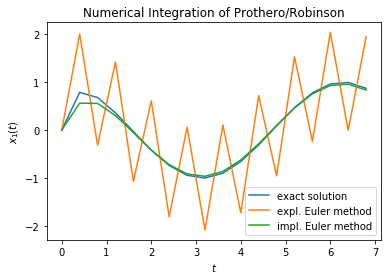

In [21]:
plt.figure()
plt.title("Numerical Integration of Prothero/Robinson")
plt.plot(Tn, [x_exact(t) for t in Tn], label="exact solution")
plt.plot(Tn, Xn,      label="expl. Euler method")
plt.plot(Tn_impl, Xn_impl,      label="impl. Euler method")
plt.xlabel("$t$")
plt.ylabel("$x_1(t)$")
plt.legend()
plt.show()

#### Task:
- Experiment:
  For which approximate stepsize $h$ is the explicit solution as close to the exact solution as the implicit solution is now?

### Experiments and Explanation

When plotting a bunch of solutions we can figure why the expl. Euler methods behaves worse then the implicit one

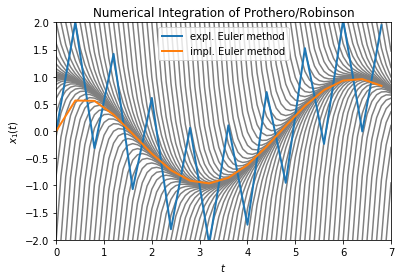

In [28]:
plt.figure()
plt.title("Numerical Integration of Prothero/Robinson")
plt.xlim([0, 7])
plt.ylim([-2, 2])
for t_start in arange(-1,7,0.1):
    x_start = array([2])
    Tall = arange(t_start,7,0.1)
    plt.plot(Tall, [x_exact(t) for t in Tall], color="gray")
    x_start = array([-2])
    plt.plot(Tall, [x_exact(t) for t in Tall], color="gray")
    
plt.plot(Tn, Xn, linewidth="2", label="expl. Euler method")
plt.plot(Tn_impl, Xn_impl, linewidth="2", label="impl. Euler method")
plt.xlabel("$t$")
plt.ylabel("$x_1(t)$")
plt.legend()
plt.show()

This is due to the problems 'stiffness'